In [1]:
setwd("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Analysis/hf_NB")
library(reshape2)
library(stringr)
library(tidyverse)
library(dplyr)
library(data.table)
library(tidyverse)
library(umap)
library(viridis)
library(RColorBrewer)
library(tidyverse)
library(factoextra)
library(cluster)
library(RColorBrewer)


Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyver

In [ ]:
#To make this work, we need to first run 0.Code/1.MEA_data_processing/1.Automatic_burst_detection_MCS_axion,
#setting hfNB_max_duration=0 hfNB_max_time_interval=0, and save results in a folder ndicating NOhf, so we will have full overview of ALL NB


In [ ]:
parent.folder<-"T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Code/Data/MEA_data/PT_all"
all_summary_files <- list.files(parent.folder, full.names = T, recursive = T, pattern = "nb_times_s150.csv")#list.files( full.names = F, recursive = T, pattern = ".*PT_all*")
all_files_dir<-dirname(all_summary_files)
all_summary_files_nohf<-str_subset(all_summary_files, "/2024_v2_results_NOhf_s150prop0.4_freqNB9_in_0.25")



In [ ]:
all_summary_files <-all_summary_files[all_summary_files %in% all_summary_files_nohf]
all_summary_files_remove<-str_subset(all_summary_files, "/hf_")
all_summary_files <-all_summary_files[!all_summary_files %in% all_summary_files_remove]

toMatch <- c("DIV14","DIV21")
matches <- unique (grep(paste(toMatch,collapse="|"), 
                        all_summary_files, value=TRUE))

all_summary_files<-all_summary_files[!all_summary_files %in% matches]


all_summary_files <- lapply(all_summary_files,read.csv)
all_summary_files<-do.call(rbind, all_summary_files)
all_summary_files<-all_summary_files[-1]

cell_line_overview<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Code/Data/cell_lines/Cell_line_overview.csv")

In [ ]:
full_results<-dplyr::left_join(all_summary_files, cell_line_overview, by=c("Phenotype" = "Cell_line_name"))
exclude_cell_lines<-rownames(full_results[full_results$Phenotype=="EXCLUDE",])
full_results<-full_results[!rownames(full_results) %in% exclude_cell_lines,]
n_ID<-c(1:dim(full_results)[1])
full_results$Unique_ID<-paste0(full_results$PT_all_path,"_",full_results$Well_Label,"_",n_ID)
rownames(full_results)<-full_results$Unique_ID

In [ ]:
NB_time_interval_back<-full_results$NB_time_interval_back
NB_time_interval_forward<-full_results$NB_time_interval_forward
full_results$short_NB_time_interval<-pmin(NB_time_interval_back, NB_time_interval_forward,na.rm = TRUE)#na.rm, if there is na, pick the other value

In [ ]:
full_results<-full_results %>% drop_na(c("mean_firing_rate_in_nb","duration","short_NB_time_interval"))

In [ ]:
write.csv(full_results,"T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Code/0.Data/MEA_data/ready/All_NB_times_s150_prop40_NB9hz25_Dev.csv")

In [ ]:
#Don't re run the part above!!!! Start here

In [16]:
full_results<-read.csv("T:/PIgroup Nael NadifKasri/Sofia/2025/MEA_seq_patient/Code/0.Data/MEA_data/ready/All_NB_times_s150_prop40_NB9hz25_Dev.csv")

In [17]:
rownames(full_results)<-full_results$X
full_results<-full_results[-1]

Warning message:
"Removed 65115 rows containing non-finite outside the scale range (`stat_density()`)."


pdf 
  2

Warning message:
"Removed 65115 rows containing non-finite outside the scale range (`stat_density()`)."


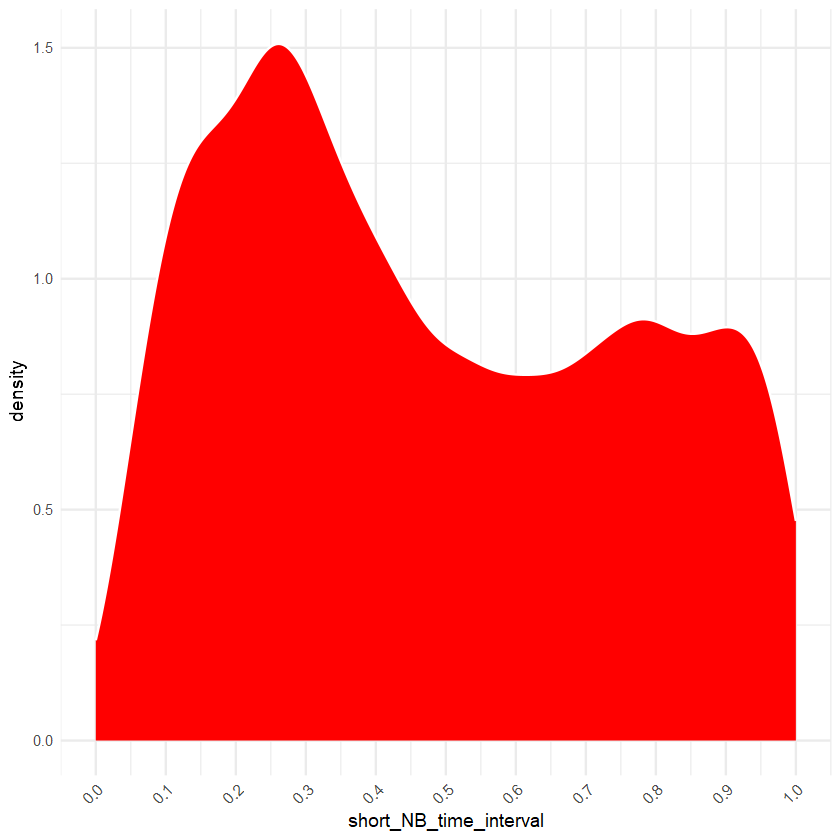

In [18]:
p<-ggplot(full_results, aes(x=short_NB_time_interval)) +   
  
   geom_density(color="white", fill="red") + theme_minimal() +scale_x_continuous(limits = c(-0, 1),
                                                                                 breaks = seq(0, 1, by = 0.1))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# tiff(paste0("short_NB_time_interval_1s.tiff"), res =400, units = "in", width = 6, height = 2)
# p
# dev.off()
# p

pdf(paste0("short_NB_time_interval_1s.pdf"), width = 6, height = 2)
p
dev.off()
p

In [45]:
p <- ggplot(full_results, aes(x = duration)) +
  geom_density(color = "white", fill = "red") +
  geom_vline(xintercept = 0.43, linetype = "dotted", color = "black", size = 0.8) +  # vertical line
  theme_minimal() +
  scale_x_continuous(
    limits = c(0, 2),
    breaks = seq(0, 2, by = 0.5)
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Save using ggsave
ggsave(
  filename = "duration_2s.pdf",
  plot = p,
  width = 6,
  height = 2,
  units = "in"
)

Warning message:
"Removed 202 rows containing non-finite outside the scale range (`stat_density()`)."


In [ ]:
#is it a diference if we do this by DIV? 

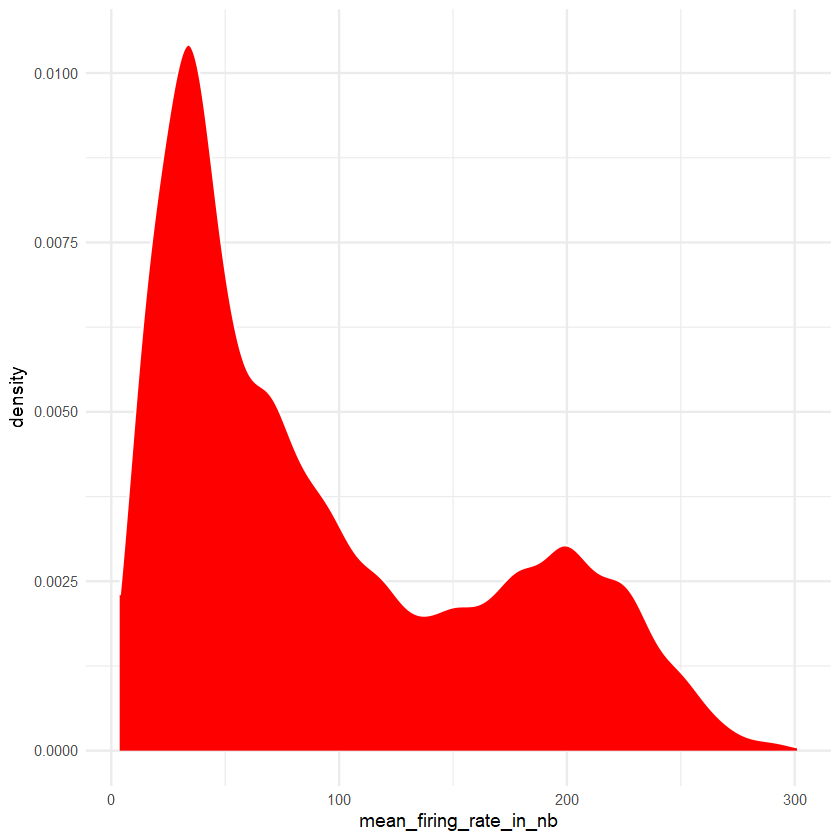

In [20]:
p<-ggplot(full_results, aes(x=mean_firing_rate_in_nb)) +   
  
   geom_density(color="white", fill="red") + theme_minimal() #+scale_x_continuous(limits = c(-0, 2)) 
p

In [ ]:
#or maybe cluster based on the three variables
# mean_firing_rate_in_nb, duration, short_NB_time_interval

In [21]:
custom.config <- umap.defaults
custom.config$random_state <- 123

In [22]:
cluster_df<-full_results[,colnames(full_results) %in% c("mean_firing_rate_in_nb","duration","short_NB_time_interval")]
cluster_df<- cluster_df %>% prcomp(center = TRUE,scale. = TRUE)
cluster_df$rotation <- -1*cluster_df$rotation
summ <- summary(cluster_df)
summ_var<-summ$importance[2,]
summ_var<-unname(summ_var[1:26])
n.components=2
cluster_df<-as.data.frame(cluster_df$x)
cluster_df<-cluster_df[,1:n.components]
cluster_df$Unique_ID<-rownames(cluster_df)
cluster_df<-inner_join(cluster_df,full_results, by="Unique_ID")
rownames(cluster_df)<-cluster_df$Unique_ID


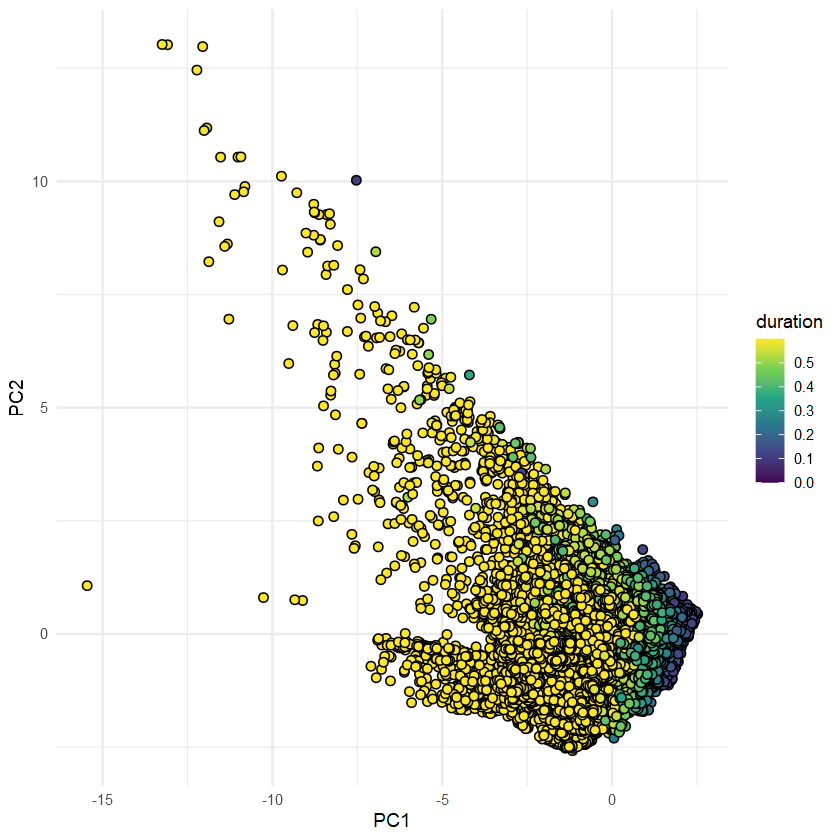

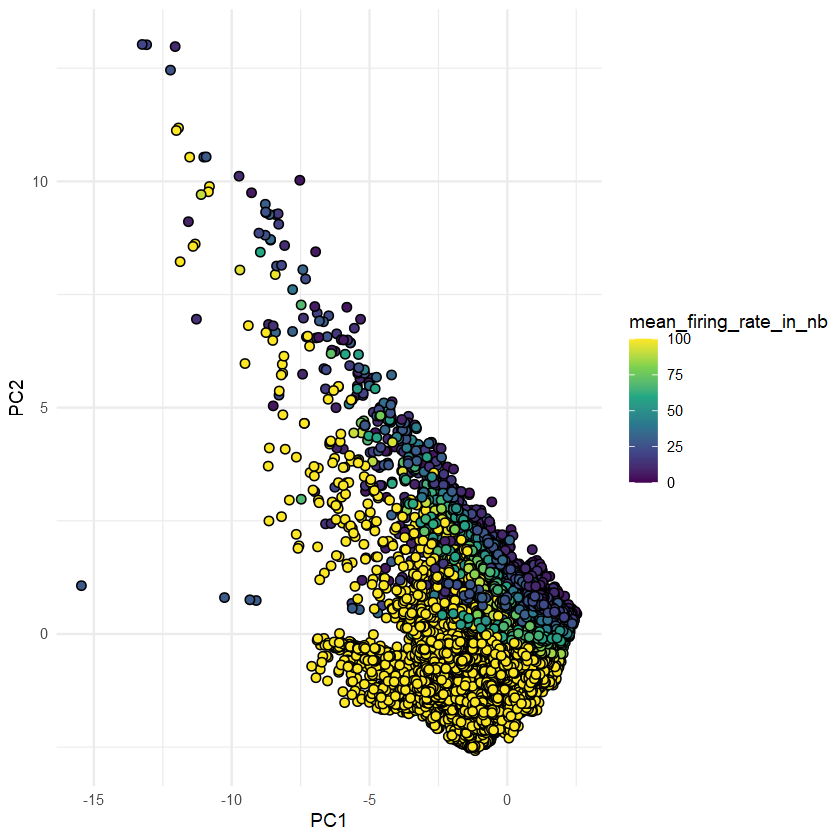

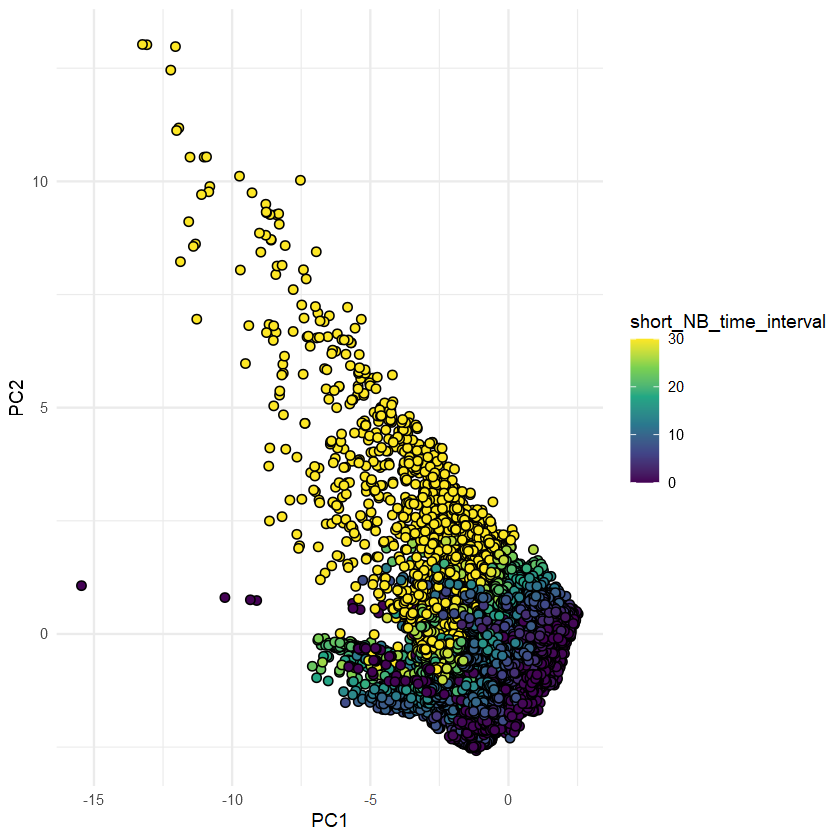

In [24]:
p<-ggplot(cluster_df, aes(PC1, PC2, fill=duration)) +
  geom_point(size=2,shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") + scale_fill_viridis_c(limits = c(0, 0.6), oob = scales::squish)+
           theme_minimal()
p

p<-ggplot(cluster_df, aes(PC1, PC2, fill=mean_firing_rate_in_nb)) +
  geom_point(size=2,shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") + scale_fill_viridis_c(limits = c(0, 100), oob = scales::squish)+
           theme_minimal()
p

p<-ggplot(cluster_df, aes(PC1, PC2, fill=short_NB_time_interval)) +
  geom_point(size=2,shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black")  + scale_fill_viridis_c(limits = c(0, 30), oob = scales::squish)+
           theme_minimal()
p

In [25]:
cluster_df<-full_results[,colnames(full_results) %in% c("mean_firing_rate_in_nb","duration","short_NB_time_interval")]
cluster_df<- cluster_df %>%  scale() %>% umap(config=custom.config)
cluster_df <- cluster_df$layout %>%as.data.frame()
colnames(cluster_df)<-c("UMAP1","UMAP2")
cluster_df$Unique_ID<-rownames(cluster_df)
cluster_df<-inner_join(cluster_df,full_results, by="Unique_ID")
rownames(cluster_df)<-cluster_df$Unique_ID


In [26]:
p<-ggplot(cluster_df, aes(UMAP1, UMAP2, fill=duration)) +
  geom_point(size=2,shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") + scale_fill_viridis_c(limits = c(0, 0.6), oob = scales::squish)+
           theme_minimal()

pdf(paste0("UMAP_duration.pdf"), width = 7, height = 5.5)

p
dev.off()


p<-ggplot(cluster_df, aes(UMAP1, UMAP2, fill=mean_firing_rate_in_nb)) +
  geom_point(size=2,shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") + scale_fill_viridis_c(limits = c(0, 50), oob = scales::squish)+
           theme_minimal()


pdf(paste0("UMAP_mean_firing_rate_in_nb.pdf"),  width = 7, height = 5.5)

p
dev.off()


p<-ggplot(cluster_df, aes(UMAP1, UMAP2, fill=short_NB_time_interval)) +
  geom_point(size=2,shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black")  + scale_fill_viridis_c(limits = c(0, 1), oob = scales::squish)+
           theme_minimal()


pdf(paste0("UMAP_mean_short_NB_time_interval.pdf"),  width = 7, height = 5.5)

p
dev.off()



pdf 
  2

pdf 
  2

pdf 
  2

In [ ]:
colnames(cluster_df)

In [27]:
p<-ggplot(cluster_df, aes(UMAP1, UMAP2, fill=DIV_range)) +
  geom_point(size=2,shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") + #scale_fill_viridis_c(limits = c(0, 0.6), oob = scales::squish)+
           theme_minimal()


pdf(paste0("UMAP_DIV.pdf"),  width = 7, height = 5.5)

p
dev.off()

pdf 
  2

In [28]:
p<-ggplot(cluster_df, aes(UMAP1, UMAP2, fill=machine)) +
  geom_point(size=2,shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") + #scale_fill_viridis_c(limits = c(0, 0.6), oob = scales::squish)+
           theme_minimal()

pdf(paste0("UMAP_machine.pdf"),  width = 7, height = 5.5)

p
dev.off()

pdf 
  2

In [ ]:
#clustering

In [29]:
head(cluster_df)

,UMAP1,UMAP2,Unique_ID,start_t,end_t,duration,NB_time_interval_back,NB_time_interval_forward,mean_firing_rate_in_nb,Well_Label,⋯,Own_control,Remove,isogenic,Remarks,Pool_Kleefstra,Pool_WTC_CHD2,Pool_CACNA1A,Pool_ARID1B_SMARCB1,Pool_ARID1B_2_rescue,short_NB_time_interval
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
D:/2024/Patient_Paper/PT_all/Developmental/DIV28/C5/MEA2570_A1_5,-5.286909,10.1329830,D:/2024/Patient_Paper/PT_all/Developmental/DIV28/C5/MEA2570_A1_5,5.1085,5.7785,0.670,NA,0.220,46.89055,A1,⋯,,,yes,MELAS_LH1,NA,NA,NA,NA,NA,0.220
D:/2024/Patient_Paper/PT_all/Developmental/DIV28/C5/MEA2570_A1_6,1.955403,8.3506478,D:/2024/Patient_Paper/PT_all/Developmental/DIV28/C5/MEA2570_A1_6,5.9985,6.5265,0.528,0.220,23.952,43.71843,A1,⋯,,,yes,MELAS_LH1,NA,NA,NA,NA,NA,0.220
D:/2024/Patient_Paper/PT_all/Developmental/DIV28/C5/MEA2570_A1_7,-10.361498,-0.8924589,D:/2024/Patient_Paper/PT_all/Developmental/DIV28/C5/MEA2570_A1_7,30.4785,31.3585,0.880,23.952,20.944,49.24242,A1,⋯,,,yes,MELAS_LH1,NA,NA,NA,NA,NA,20.944
D:/2024/Patient_Paper/PT_all/Developmental/DIV28/C5/MEA2570_A1_8,-10.297296,-0.8900379,D:/2024/Patient_Paper/PT_all/Developmental/DIV28/C5/MEA2570_A1_8,52.3025,53.1565,0.854,20.944,21.018,48.69243,A1,⋯,,,yes,MELAS_LH1,NA,NA,NA,NA,NA,20.944
D:/2024/Patient_Paper/PT_all/Developmental/DIV28/C5/MEA2570_A1_9,-10.350718,-0.8381565,D:/2024/Patient_Paper/PT_all/Developmental/DIV28/C5/MEA2570_A1_9,74.1745,75.0425,0.868,21.018,20.448,48.29109,A1,⋯,,,yes,MELAS_LH1,NA,NA,NA,NA,NA,20.448
D:/2024/Patient_Paper/PT_all/Developmental/DIV28/C5/MEA2570_A1_10,-10.369451,-0.8457046,D:/2024/Patient_Paper/PT_all/Developmental/DIV28/C5/MEA2570_A1_10,95.4905,96.3685,0.878,20.448,20.850,48.97494,A1,⋯,,,yes,MELAS_LH1,NA,NA,NA,NA,NA,20.448


In [30]:
kmeans_df<-cluster_df[,1:2]

Warning message:
"did not converge in 10 iterations"
Warning message:
"did not converge in 10 iterations"
Warning message:
"did not converge in 10 iterations"
Warning message:
"did not converge in 10 iterations"
Warning message:
"did not converge in 10 iterations"


pdf 
  2

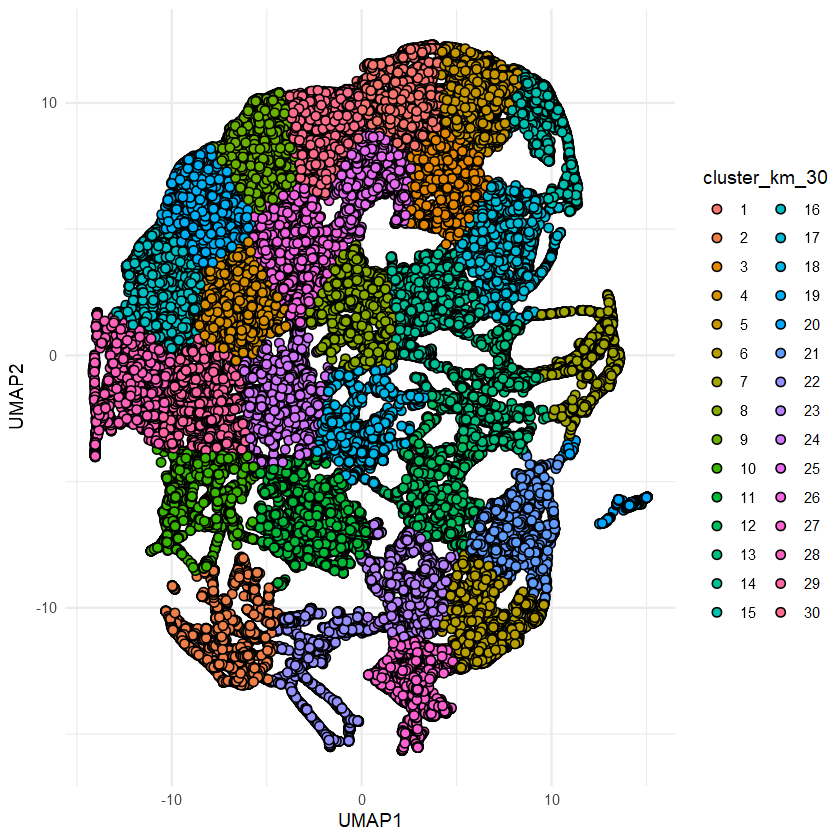

In [31]:
# n_colors=c("#9999CC","#33CC99","#FF9966","#3399FF","#FF00FF","#CCFF99","#FF3300")
km_30 <- kmeans(kmeans_df, centers = 30, nstart = 25)
km_30_assigns<-as.data.frame(km_30$cluster)
km_30_assigns$Unique_ID<-rownames(km_30_assigns)
km_30_assigns_plot<-inner_join(cluster_df,km_30_assigns,by="Unique_ID")
#colnames(km_30_assigns_plot)<-c('UMAP1','UMAP2','ID','Well_Label','Phenotype','cluster_km6')
colnames(km_30_assigns_plot)[colnames(km_30_assigns_plot) == 'km_30$cluster'] <- 'cluster_km_30'
km_30_assigns_plot$origin<-"all_data"
#head(km_30_assigns_plot)
km_30_assigns_plot$cluster_km_30<-factor(km_30_assigns_plot$cluster_km_30)
p<-ggplot(km_30_assigns_plot, aes(UMAP1, UMAP2, fill=cluster_km_30)) +
  geom_point(size=2,shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") +theme_minimal()#+scale_fill_manual(values=n_colors)
p

pdf("UMAP_clustering_km_30.pdf",  width = 7, height = 5.5)

p
dev.off()

In [32]:
cluster_df_km_30<-left_join(cluster_df,km_30_assigns_plot[, colnames(km_30_assigns_plot) %in% c("cluster_km_30","Unique_ID")], by="Unique_ID")

In [33]:
cluster_df_km_30_sum<-cluster_df_km_30  %>%
      group_by(cluster_km_30) %>% 
    dplyr::summarize(mean_dur = mean(duration, na.rm = TRUE),
                     max_dur = max(duration, na.rm = TRUE),
            mean_short_interval = mean(short_NB_time_interval, na.rm = TRUE),
            max_short_interval = max(short_NB_time_interval, na.rm = TRUE),
            mean_firing_rate_in_nb = mean(mean_firing_rate_in_nb, na.rm = TRUE),
            max_firing_rate_in_nb = max(mean_firing_rate_in_nb, na.rm = TRUE))

cluster_df_km_30_sum

write.csv(cluster_df_km_30_sum,"cluster_df_km_30_sum.csv")

cluster_km_30,mean_dur,max_dur,mean_short_interval,max_short_interval,mean_firing_rate_in_nb,max_firing_rate_in_nb
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4847007,0.618,2.8240117,6.764,31.38959,31.38959
2,1.3276596,2.716,12.8945577,35.380,193.37664,193.37664
3,0.3971193,0.514,5.8047425,17.226,41.95610,41.95610
4,0.6549089,0.942,14.9483342,21.306,34.32173,34.32173
5,0.4110551,0.504,1.8750795,4.526,31.98552,31.98552
6,0.6087364,0.818,5.7924561,10.254,217.60513,217.60513
7,0.3588749,0.468,0.7139107,2.918,109.43585,109.43585
8,0.6226699,0.828,6.9507670,14.314,78.33603,78.33603
9,0.6669250,0.770,5.3645151,9.912,28.14060,28.14060


In [ ]:
#split the burst based on duration and then calculate the short interval

In [46]:
grouped_data <- cluster_df %>%
  mutate(group = ifelse(duration < 0.43, "short_dur", "normal"))

In [48]:

p <- ggplot(grouped_data, aes(x = short_NB_time_interval, fill = group, color = group)) +
  geom_density(alpha = 0.5) +
  geom_vline(xintercept = 0.6, linetype = "dotted", color = "black", size = 0.8) +  # vertical dotted line
  theme_minimal() +
  scale_x_continuous(
    limits = c(0, 3),
    breaks = seq(0, 3, by = 0.5)
  ) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"  # remove legend
  )

ggsave(
  filename = "density_short_time_grouped_043_3s.pdf",
  plot = p,
  width = 6,
  height = 2,
  units = "in"
)

Warning message:
"Removed 56646 rows containing non-finite outside the scale range (`stat_density()`)."


In [42]:
p<-ggplot(grouped_data, aes(x=short_NB_time_interval,fill=group, color=group)) +   
  
   geom_density(alpha = 0.5) + theme_minimal() +scale_x_continuous(limits = c(-0, 3),
                                                                                 breaks = seq(0, 3, by = 0.5)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


pdf(paste0("density_short_time_grouped_04_3s.pdf"), width = 8, height = 2)
p
dev.off()

Warning message:
"Removed 56646 rows containing non-finite outside the scale range (`stat_density()`)."


pdf 
  2